<h1>Table of Contents</h1>

1. [Data loading](#Loading)
2. [Benefits](#Benefits)
3. [Sectors](#Sectors)
    * [Proportion](#Sectors1)
    * [Average Benefits](#Sectors2)
4. [Titles](#Titles)
5. [Employers](#Employers)

<h1>Loading data</h1>
<a id='Loading'></a>

Required libraries

In [1]:
import pandas as pd
from statsmodels import robust

Load CSV file containing [2021 Ontario Sunshine List.](https://www.ontario.ca/public-sector-salary-disclosure/2021/all-sectors-and-seconded-employees/)

In [2]:
df = pd.read_csv('2021_sunshine.csv')
df.head()

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
0,Colleges,Aarts,Cheri,115618.46,74.25,Fanshawe College Of Applied Arts and Technology,Professor,2021,0
1,Colleges,Aaslepp,Drew,114506.79,124.66,Humber College Institute Of Technology and Adv...,Professor,2021,1
2,Colleges,Abba,Corinne,106770.74,124.45,George Brown College Of Applied Arts and Techn...,Librarian,2021,2
3,Colleges,Abbott,Brian,107378.44,124.61,Conestoga College Institute Of Technology and ...,Professor,2021,3
4,Colleges,Abbott,Kathleen,162873.26,428.40,George Brown College Of Applied Arts and Techn...,"Associate Dean, Centre for Continuous Learning",2021,4


244,390 candidates in data set.

In [3]:
df.shape

(244390, 9)

Data already clean: free of missing values in all columns.

In [4]:
df.isna().sum()

Sector        0
Last Name     0
First Name    0
Salary        0
Benefits      0
Employer      0
Job Title     0
Year          0
_docID        0
dtype: int64

<h1>Examining Benefits</h1>
<a id='Benefits'></a>

The **majority of candidates get benefits**, at around 73%.

In [5]:
df[df['Benefits'] > 0].shape[0]/df.shape[0]

0.7277711854003847

Distribution of benefit values: **long right-tail with majority of benefits under $10,000.** Use of medians may be advised over means as averages of central tendency.

<AxesSubplot:title={'center':'Distribution of Benefits in the 2021 Ontario Sunshine List'}, ylabel='Frequency'>

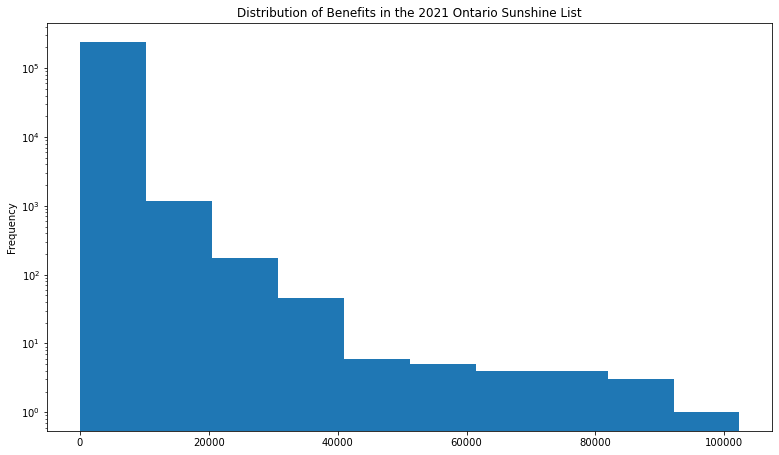

In [6]:
df['Benefits'].plot.hist(
    bins=10,
    logy=True,
    title='Distribution of Benefits in the 2021 Ontario Sunshine List',
    figsize=(13,7.5))

<h1>Examining Sectors</h1>
<a id='Sectors'></a>

**Sectors by highest proportion of candidates with benefits**
<a id='Sectors1'></a>

**Most sectors had a high proportion (>80%) of candidates that received benefits**, particularly secondments which all had them. The exceptions to this rule were positions in school boards and education secondments.

<AxesSubplot:title={'center':'2021 Ontario Sunshine List Sectors by Proportion of \n    Candidates with Benefits'}, xlabel='Sector'>

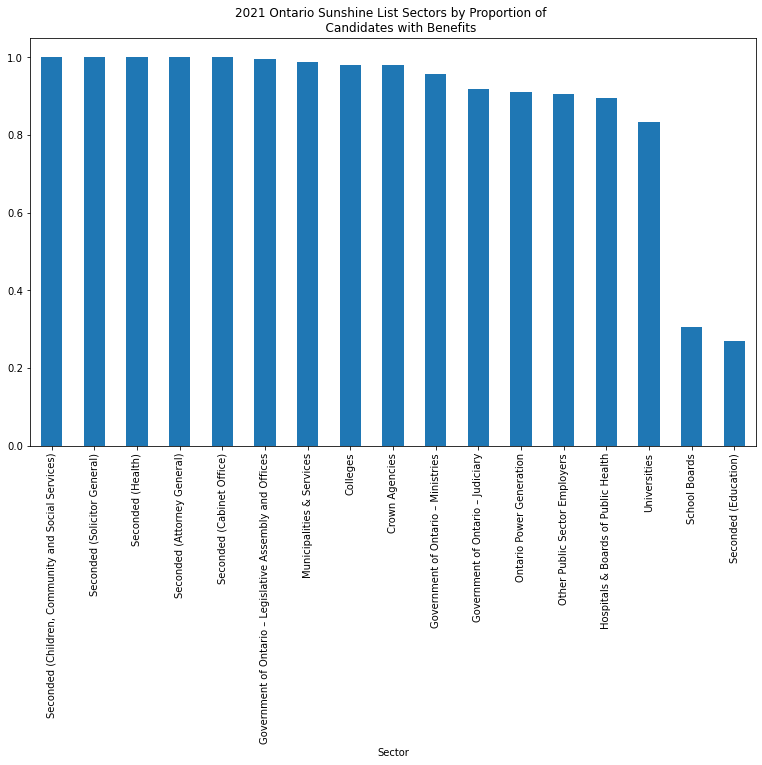

In [7]:
swb = df[df['Benefits'] > 0].groupby('Sector')['Benefits'].count()
spro = swb/df.groupby('Sector')['Benefits'].count()

spro.sort_values(ascending=False, inplace=True)
spro.plot.bar(
    title='''2021 Ontario Sunshine List Sectors by Proportion of 
    Candidates with Benefits''',
    figsize=(13,7.5))

**Sectors by highest median benefits**
<a id='Sectors2'></a>

**The highest median benefits were found in Ontario Power Generation, secondments, and the health sector.** 

<AxesSubplot:title={'center':'2021 Ontario Sunshine List Sectors by Median Benefits'}, xlabel='Sector'>

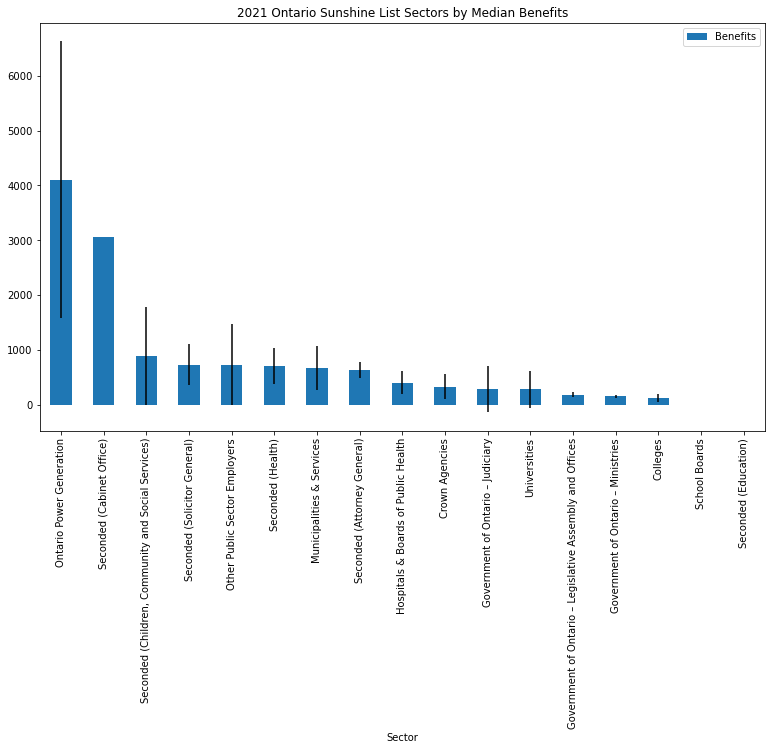

In [8]:
smed = df.groupby('Sector', as_index=False)['Benefits'].median()
smed.sort_values(by='Benefits', ascending=False, inplace=True)

serr = df.groupby('Sector')['Benefits'].apply(robust.mad)

smed.plot.bar(
    'Sector', 
    'Benefits', 
    yerr = serr,
    title='2021 Ontario Sunshine List Sectors by Median Benefits',
    figsize=(13,7.5))

<h1>Examining Job Titles</h1>
<a id='Titles'></a>

**Specializations with the highest average benefits**
<a id='Titles1'></a>

"Specialization" is used here to refer to positions with more than 50 list candidates. This cutoff was chosen to exclude top leadership positions such as presidents and executives in favor of technical professions.

The top specialized job titles by benefits were **inspectors, technologists, technicians, and their assistants**, many of whom may be members of OPG.

<ipython-input-9-17ffb34ae5f2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moretitles = df.groupby('Job Title')['Job Title', 'Benefits']\


<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Job Titles by Benefits'}, xlabel='Job Title'>

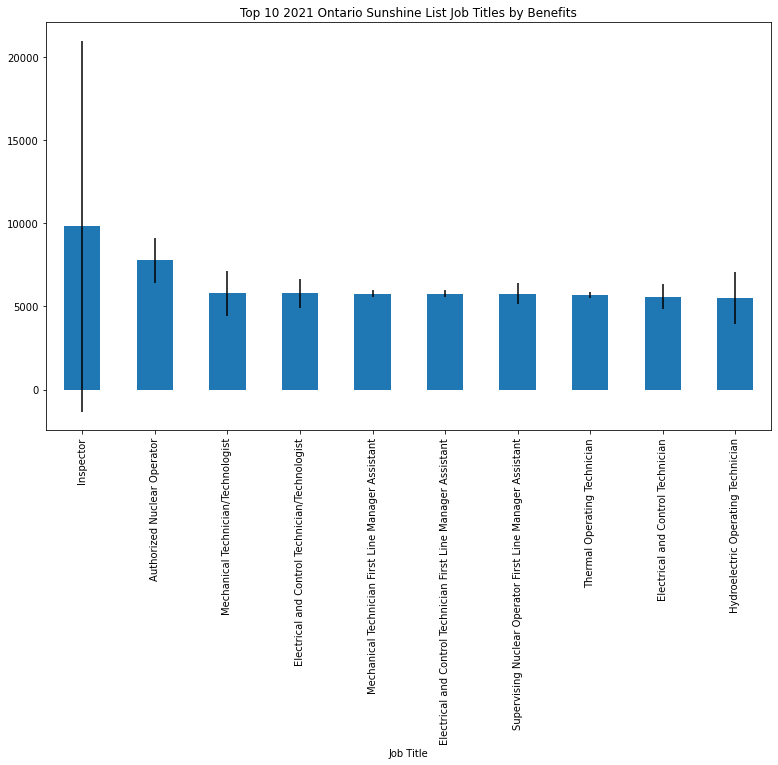

In [9]:
#Filter out rows that have job titles which are under the candidate number threshold
moretitles = df.groupby('Job Title')['Job Title', 'Benefits']\
    .filter(lambda x: len(x) > 50)

#Calculate medians and MADs for top 10 highest-paying titles
toptitles = moretitles.groupby('Job Title')['Benefits']\
    .median().sort_values(ascending=False).head(10)

terr = moretitles.groupby('Job Title')['Benefits'].apply(robust.mad)

toptitles.plot.bar(
    yerr=terr,
    title='Top 10 2021 Ontario Sunshine List Job Titles by Benefits',
    figsize=(13,7.5))

The high MAD of Inspector Benefits may merit further investigation of such specialties.

<h1>Examining Employers</h1>
<a id='Employers'></a>

**Employers with the highest benefits**
<a id='Employers1'></a>

The candidate cutoff of 50 was used again to select employers with more list candidates, demonstrating a pattern of sufficiently high salaries on a significant level. A variety of organizations are represented here.

<ipython-input-11-7eef236730eb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moreemployers = df.groupby('Employer')['Employer', 'Benefits']\


<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Employers by Benefits'}, xlabel='Employer'>

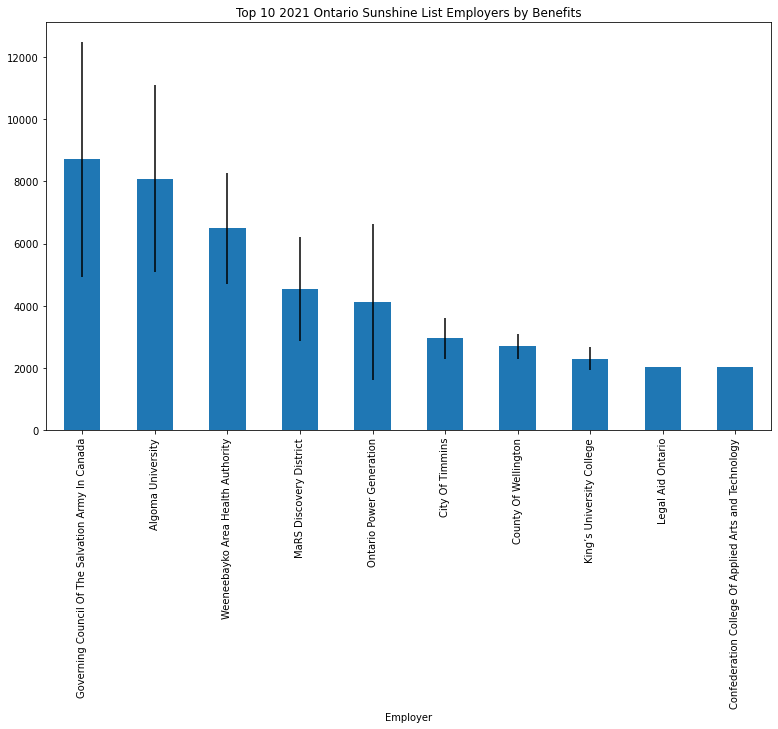

In [11]:
#Filter out rows that have employers which have less than 10 list candidates
moreemployers = df.groupby('Employer')['Employer', 'Benefits']\
    .filter(lambda x: len(x) > 50)

#Calculate medians and MADs for top 10 highest-paying titles
topemployers = moreemployers.groupby('Employer')['Benefits']\
    .median().sort_values(ascending=False).head(10)

eerr = moreemployers.groupby('Employer')['Benefits'].apply(robust.mad)

topemployers.plot.bar(
    yerr=eerr,
    title='Top 10 2021 Ontario Sunshine List Employers by Benefits',
    figsize=(13,7.5))

<h1>Testing cells</h1>

In [12]:
opg = df[df['Sector'].str.contains('Ontario Power Generation')]
opg.head()

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
123467,Ontario Power Generation,Aaltomaa,Tomi,138618.17,3961.71,Ontario Power Generation,First Line Manager – Operating,2021,123467
123468,Ontario Power Generation,Aamir,Muhammad,184868.62,515.20,Ontario Power Generation,Senior Manager Design Engineering,2021,123468
123469,Ontario Power Generation,Abayomi,Matthew,137063.24,1436.40,Ontario Power Generation,Electrical and Control Technician,2021,123469
123470,Ontario Power Generation,Abbas,Syed,151561.85,4244.94,Ontario Power Generation,Senior Technical Engineer/Officer,2021,123470
123471,Ontario Power Generation,Abbasi,Arash,135172.75,752.64,Ontario Power Generation,Cost and Schedule Analyst,2021,123471


In [13]:
insp = df[df['Job Title'].str.contains('Inspector')]
insp.head(10)

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
10001,Crown Agencies,Delarosbel,Justin,107233.80,2412.07,Ontario Northland Transportation Commission,Track Inspector / Inspecteur des voies ferrées,2021,10001
10880,Crown Agencies,Gallagher,Christopher,134178.32,2530.31,Niagara Parks Commission,"Inspector, Inspecteur",2021,10880
16168,Crown Agencies,Solomon,William,101282.30,1811.92,Ontario Northland Transportation Commission,Track Inspector / Inspecteur des voies ferrées,2021,16168
18573,Government of Ontario – Legislative Assembly a...,Mcgowan,Steven,115251.44,151.56,Legislative Assembly,"Inspector, Operations Manager / Inspecteur, ch...",2021,18573
19295,Government of Ontario – Ministries,Archibald,Charles,100676.44,567.00,"Labour, Training and Skills Development","Occupational Health and Safety Inspector, Indu...",2021,19295
19311,Government of Ontario – Ministries,Armstrong,Allen,108902.12,203.04,"Labour, Training and Skills Development","Occupational Health and Safety Inspector, Indu...",2021,19311
19574,Government of Ontario – Ministries,Baird,Jenna,108108.40,203.04,"Labour, Training and Skills Development","Occupational Health and Safety Inspector, Indu...",2021,19574
19705,Government of Ontario – Ministries,Barber,Stella,103116.00,203.04,"Labour, Training and Skills Development","Occupational Health and Safety Inspector, Indu...",2021,19705
19716,Government of Ontario – Ministries,Barclay,Brian,172552.36,726.45,Ontario Provincial Police,Inspector,2021,19716
19811,Government of Ontario – Ministries,Barton,Natalie,105660.55,203.04,"Labour, Training and Skills Development","Occupational Health and Safety Inspector, Cons...",2021,19811
